# Fake Currency Detection using Machine Learning
Fake currency detection is a real problem for both individuals and businesses. Counterfeiters are constantly finding new ways and techniques to produce counterfeit banknotes, which are basically indistinguishable from real money. At least to the human eye. In this article, I will introduce you to counterfeit currency detection using machine learning.

Detecting counterfeit currency is a binary classification task in machine learning. If we have enough data on real and fake banknotes, we can use this data to train a model that can classify new banknotes as real or fake.

The dataset contains the following four input propertie- 

• Transforms the image variance into wav
- Transforms image asymmetry into wavelets.
- Kurtosis transforms the image into wavelets.
- Image entropy.eentropy.

The target value is simply 0 for real banknotes and 1 for fake banknotes. Let us now begin the task of detecting counterfeit currency using machine learning.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [21]:
df = pd.read_csv('data_banknote_authentication.txt', header=None)
df.columns =  ['Variance', 'Skewness', 'Curvature', 'Entropy', 'Authentication']
df.head()

,Variance,Skewness,Curvature,Entropy,Authentication
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


# Data Overview and Visualization

In [22]:
df.shape

(1372, 5)

In [23]:
df.isnull().sum()

Variance          0
Skewness          0
Curvature         0
Entropy           0
Authentication    0
dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Variance        1372 non-null   float64
 1   Skewness        1372 non-null   float64
 2   Curvature       1372 non-null   float64
 3   Entropy         1372 non-null   float64
 4   Authentication  1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [25]:
df.describe()

,Variance,Skewness,Curvature,Entropy,Authentication
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


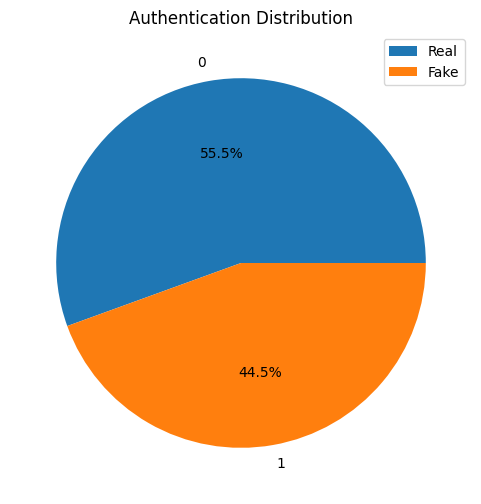

In [28]:
target_counts = df['Authentication'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=target_counts.index, autopct='%1.1f%%')

plt.title('Authentication Distribution')
plt.legend(labels=['Real', 'Fake'])
plt.show()

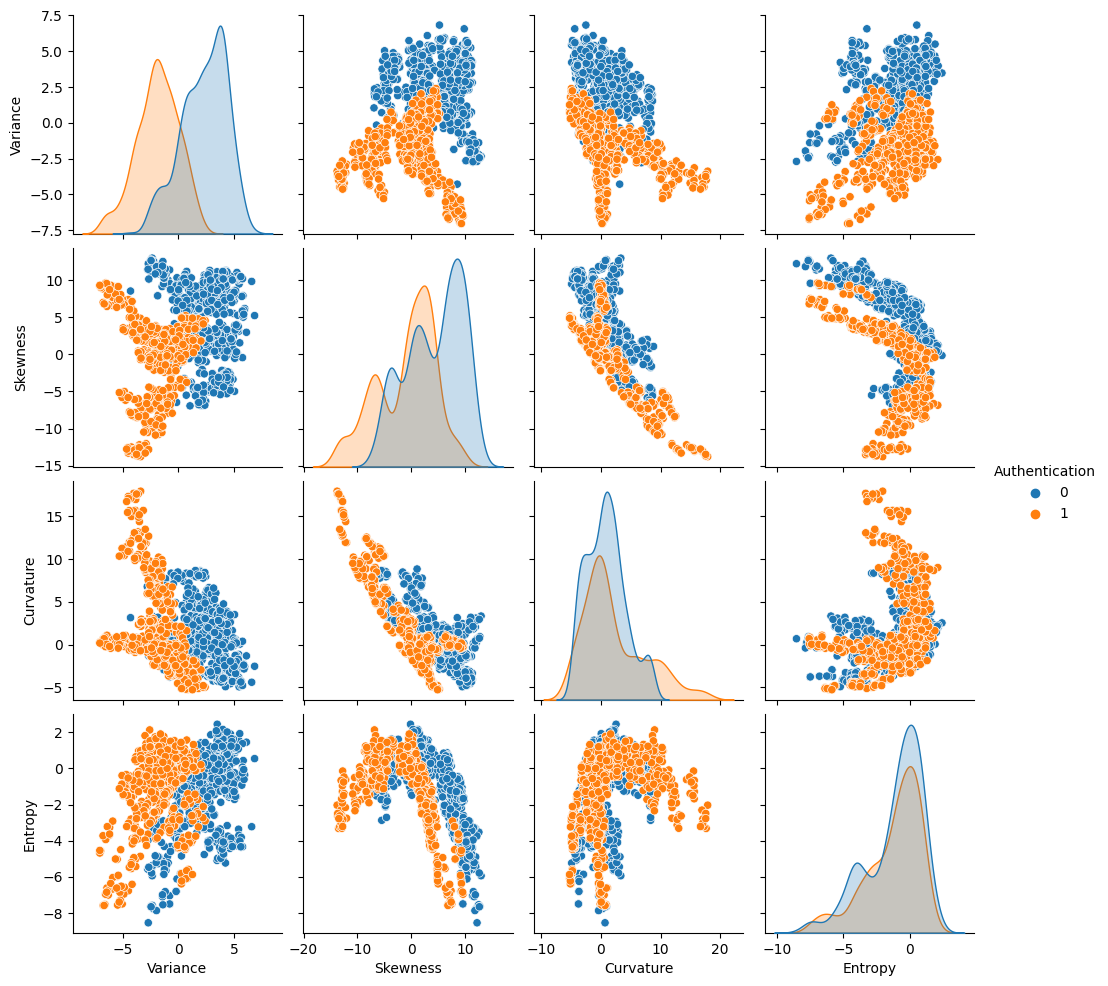

In [27]:
sns.pairplot(df, hue='Authentication')
plt.show()

From this pair chart we can make several interesting observations:
- The variance and skew distributions appear to be quite different for the two target properties, while the curvature and entropy appear to be more similar.
- There are clear linear and non-linear trends in the input features.
- Some characteristics appear to be interrelated.
- Certain features seem to separate real and counterfeit banknotes well.well.

## Balancing the Target
Now we need to balance our data, the easiest way to do this is to randomly delete a number of instances of the target function that are over-represented. This is called random undersampling.

Otherwise, we can also generate new synthetic data for the underrepresented target group. This is called oversampling. For now, let's start by randomly deleting 152 notes of actual banknotes.

In [29]:
nb_to_delete = target_counts[0] - target_counts[1]
df = df.sample(frac=1, random_state=42).sort_values(by='Authentication')
df = df[nb_to_delete:]
print(df['Authentication'].value_counts())

Authentication
0    610
1    610
Name: count, dtype: int64


## Training and Scaling the data

In [32]:
X = df.drop(columns='Authentication').values
y = df['Authentication'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
model = LogisticRegression(solver='lbfgs', random_state=42, multi_class='auto')

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)*100
print(f'Accuracy of the model: {accuracy: .2f} %')

Accuracy of the model:  98.36 %


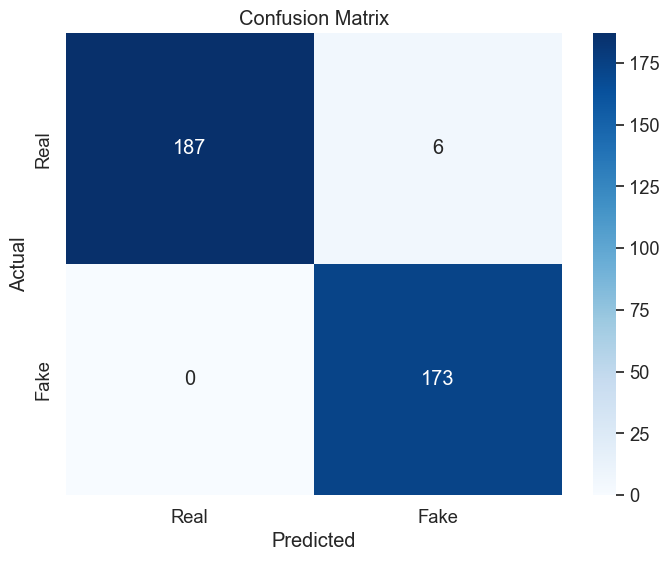

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       187
           1       1.00      0.97      0.98       179

    accuracy                           0.98       366
   macro avg       0.98      0.98      0.98       366
weighted avg       0.98      0.98      0.98       366



In [37]:
cm = confusion_matrix(y_test, y_pred)

class_labels = ["Real", "Fake"]

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust the font size if needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

print(classification_report(y_pred, y_test))

The logistic regression model achieved an accuracy of 98.36%. Not only that, when our fake currency detection model predicted real banknotes, it was correct 100% of the time.